In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('d:/projects/pyfisher/before.jpg', 0)
img1 = cv2.imread('d:/projects/pyfisher/after.jpg', 0)
diff = cv2.absdiff(img, img1)
ret, th1 = cv2.threshold(diff,64,255, cv2.THRESH_BINARY)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(th1, connectivity=8)
ccs = list(filter(lambda x: x[1][cv2.CC_STAT_AREA] > 20 and x[1][cv2.CC_STAT_AREA] < 100, enumerate(stats)))
if len(ccs) == 1:
    print(ccs[0][1][cv2.CC_STAT_AREA], centroids[ccs[0][0]])
cv2.circle(th1, tuple(map(int, centroids[1])), radius=7, color=(255,255,255), thickness=1)
f = plt.figure(figsize=(28, 20))
plt.gray()
f.add_subplot(2, 3, 1)
plt.imshow(img)
f.add_subplot(2, 3, 4)
plt.imshow(img1)
f.add_subplot(2, 3, 2)
plt.imshow(th1)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


before = cv2.imread('d:/projects/pyfisher/before.jpg')
before = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after = cv2.imread('d:/projects/pyfisher/after.jpg')
after = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)

f = plt.figure(figsize=(28, 20))
f.add_subplot(2, 3, 1)
plt.imshow(before)
f.add_subplot(2, 3, 4)
plt.imshow(after)
# f.add_subplot(2, 3, 2)
# plt.imshow(th1)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('after.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

ds = 3
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
im = cv2.dilate(im, element)
im = cv2.erode(im, element)
plt.imshow(im)
plt.show()

In [ ]:
import cv2

#method = cv2.TM_SQDIFF_NORMED

# Read the images from the file
i2 = cv2.imread('bobbber1.jpg')
i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)
i1 = cv2.imread('after.jpg')
i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)

result = cv2.matchTemplate(i1, i2, cv2.TM_SQDIFF_NORMED)

# We want the minimum squared difference
mn,_,mnLoc,_ = cv2.minMaxLoc(result)

# Draw the rectangle:
# Extract the coordinates of our best match
MPx,MPy = mnLoc

# Step 2: Get the size of the template. This is the same size as the match.
trows,tcols = i2.shape[:2]

# Step 3: Draw the rectangle on large_image
cv2.rectangle(i1, (MPx,MPy),(MPx+tcols,MPy+trows),(0,0,255),2)

plt.imshow(i1)
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('bobbber1.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('after.jpg', cv.IMREAD_GRAYSCALE) # trainImage
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# for match in good:
#   p1 = kp1[match.queryIdx].pt
#   p2 = kp2[match.trainIdx].pt
x = good[0][0]
p = kp2[x.trainIdx].pt
p = tuple(map(int, p))
cv.circle(img2, p, 10, (255,255,255))
plt.imshow(img2),plt.show()

In [7]:
import matplotlib.pyplot as plt
import math
import cv2 as cv

def plot_images(imgs, images_per_row = 3):
    """Plot a series of images"""
    plt.gray()
    plt.rcParams.update({"figure.facecolor":  (0.0, 0.0, 0.0, 0.5)})
    f = plt.figure(figsize=(28, 10))
    for k, l in enumerate(imgs):
        f.add_subplot(math.ceil(len(imgs)/images_per_row), images_per_row, k + 1)
        plt.imshow(l)
    plt.show()


def dilate_erode(img, ds = 5):
    """Combined dilate-erode filter"""
    element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * ds + 1, 2 * ds + 1), (ds, ds))
    im = img
    im = cv.dilate(im, element)
    im = cv.erode(im, element)
    return im



<Figure size 432x288 with 0 Axes>

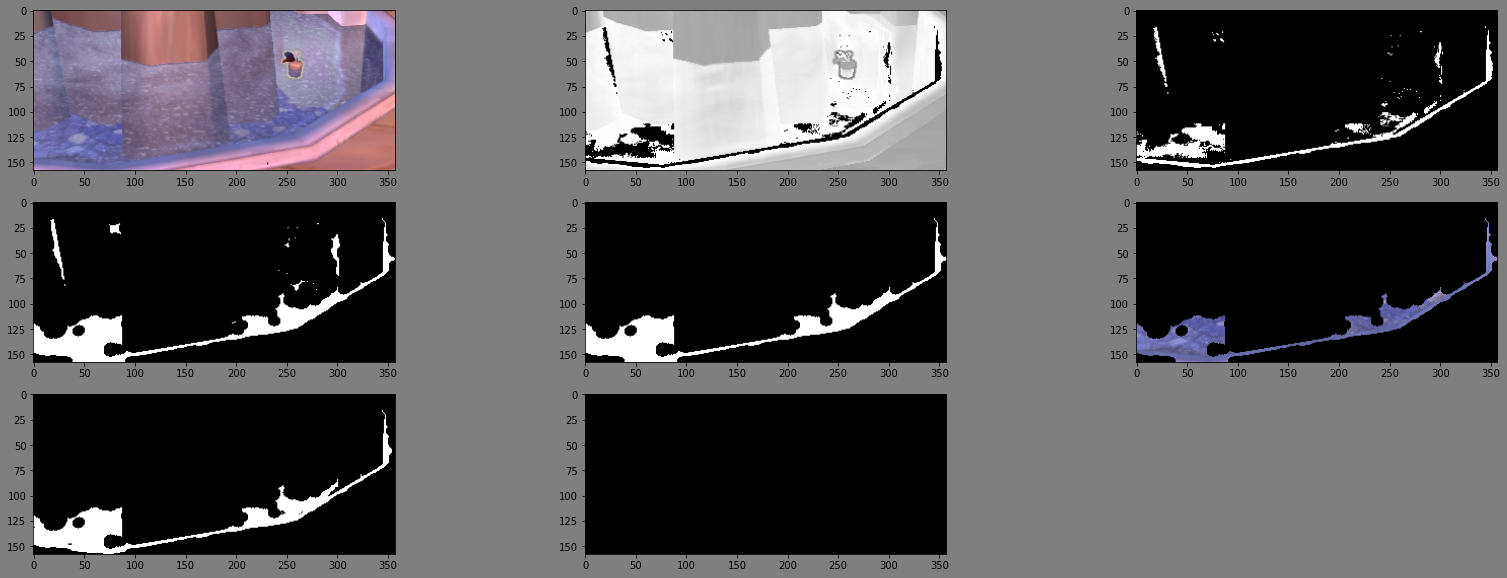

In [11]:
import cv2 as cv
import numpy as np
imgs = []
img = cv.cvtColor(cv.imread('after.png'), cv.COLOR_RGB2BGR)
hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
hue = hls[:,:,0]
r, mask = cv.threshold(hue, 0, 1, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)
im = dilate_erode(mask)
nb_components, output, stats, centroids = cv.connectedComponentsWithStats(im, connectivity=8)
# for i, c in enumerate(centroids):
#     if stats[i][cv.CC_STAT_AREA] > 40 and stats[i][cv.CC_STAT_AREA] < 4000:
#         cv.circle(img, tuple(map(int, c)), radius=9, color=(255,0,), thickness=2)

ccs = []
for i in range(1, nb_components):
    if stats[i][cv.CC_STAT_AREA] > 400:
        ccs.append((output==i).astype(np.uint8))

imgs += [img, hue, mask, im] + ccs

blue1 = (100, 0, 0)
blue2 = (123, 255, 255)

red1 = (1, 0, 0)
red2 = (19, 255, 255)

red_range = (120, 170)
blue_range = (120, 170)

for i, m in enumerate(ccs):
    m1 = cv.bitwise_and(img, img, mask=m)
    hsv = cv.cvtColor(m1, cv.COLOR_RGB2HSV)
    m_blue = cv.inRange(hsv, blue1, blue2)
    m_red = cv.inRange(hsv, red1, red2)
    blue_cnt = np.count_nonzero(m_blue == 255)
    red_cnt = np.count_nonzero(m_red == 255)
    imgs += [m1, m_blue, m_red]
    if blue_cnt > blue_range[0] and blue_cnt < blue_range[1] and \
        red_cnt > red_range[0] and red_cnt < red_range[1]:
        imgs.append(m1)

plot_images(imgs)


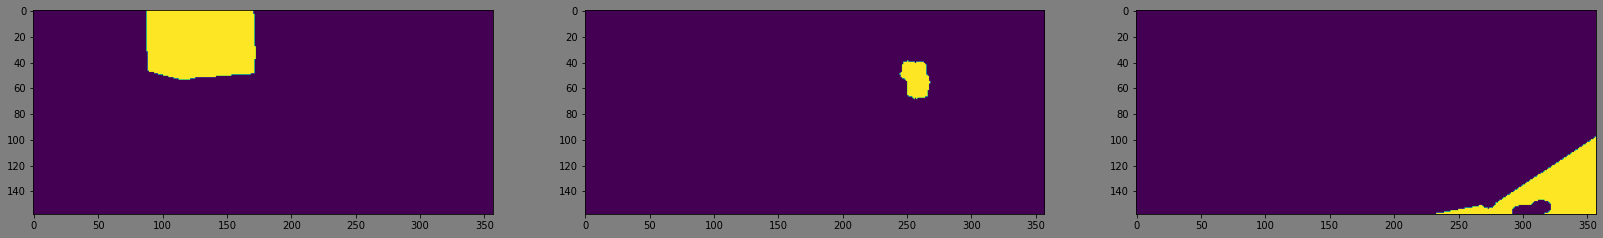

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('after.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
num_labels, labels_im = cv2.connectedComponents(im)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im, connectivity=8)
pass

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    return labeled_img

def imshow_components1(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    return labeled_img


img = imshow_components(labels_im)
img1 = imshow_components1(output)

ccs = []

for i in range(1, nb_components):
    if stats[i][cv2.CC_STAT_AREA] > 400:
        ccs.append(output==i)

plot_images(ccs)